# Movie Database

取得MovieLens資料上的電影及評分資料。

## 下載資料到電腦上

In [6]:
!wget http://files.grouplens.org/datasets/movielens/ml-1m.zip
!unzip ml-1m.zip
!ls -l ml-1m

--2024-01-03 10:37:01--  http://files.grouplens.org/datasets/movielens/ml-1m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5917549 (5.6M) [application/zip]
Saving to: ‘ml-1m.zip’

ml-1m.zip           100%[===================>]   5.64M  8.51MB/s    in 0.7s    

2024-01-03 10:37:02 (8.51 MB/s) - ‘ml-1m.zip’ saved [5917549/5917549]

Archive:  ml-1m.zip
   creating: ml-1m/
  inflating: ml-1m/movies.dat        
  inflating: ml-1m/ratings.dat       
  inflating: ml-1m/README            
  inflating: ml-1m/users.dat         
total 24328
-rw-r----- 1 root root   171308 Mar 26  2003 movies.dat
-rw-r----- 1 root root 24594131 Feb 28  2003 ratings.dat
-rw-r----- 1 root root     5577 Jan 29  2016 README
-rw-r----- 1 root root   134368 Feb 28  2003 users.dat


## 載入相關套件

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import seaborn as sns
import numpy as np
import random
import os

# 載入 Google Drive 套件
from google.colab import drive
from IPython import display

In [3]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-01-03 10:36:52--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.204.101, 172.217.204.113, 172.217.204.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mdqssas00rhdiclcf8dguda9us5o6ebi/1704278175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2aacf5f8-3409-4887-8d43-a3aff4885cec [following]
--2024-01-03 10:36:55--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mdqssas00rhdiclcf8dguda9us5o6ebi/1704278175000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=2aacf5f8-3409-4887-8d43-a3aff4885cec
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.26.132, 2607:f8b0:400c:c04::84
Connecting to doc

## 讀取資料

查看資料說明

In [125]:
!cat ml-1m/README

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

ratings.dat檔案內的格式 UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

users.dat檔案內的格式 UserID::Gender::Age::Occupation::Zip-code

- Gender  a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation 職業的編碼

movies.dat檔案內的格式 MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres 電影類型
- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [76]:
ratings_df = pd.read_csv('ml-1m/ratings.dat', sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python")
users_df = pd.read_csv('ml-1m/users.dat', sep="::", names=["UserID", "Gender", "Age", "Occupation", "Zip-code"], engine="python")
movies_df = pd.read_csv('ml-1m/movies.dat', sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")

In [78]:
occupation_mapping = {
    0:  "其他或未指定",
    1:  "學術/教育者",
    2:  "藝術家",
    3:  "文書/行政人員",
    4:  "大學/研究生",
    5:  "服務業",
    6:  "醫生/衛生保健從業者",
    7:  "行政/管理人員",
    8:  "農民",
    9:  "家庭主婦",
    10:  "高中（含以下）學生",
    11:  "律師",
    12:  "程序員",
    13:  "退休",
    14:  "銷售/市場行銷",
    15:  "科學家",
    16:  "自由職業者",
    17:  "技術員/工程師",
    18:  "工匠/技工",
    19:  "失業",
    20:  "作家"
}


# 合併ratings, users
merged_data = pd.merge(ratings_df, users_df, on='UserID')
# 再合併movies
merged_data = pd.merge(merged_data, movies_df, on='MovieID')
# 把其他職業消去
merged_data = merged_data[merged_data['Occupation'] != 0]
# 翻譯表
unique_genres = merged_data['Genres'].unique()

merged_data.head()
# 多加一個欄位，職業轉成繁體中文
merged_data['Occupation_TW'] = merged_data['Occupation'].map(occupation_mapping)
# 多加一個欄位，Datetime翻成西元格式
merged_data['Datetime'] = pd.to_datetime(merged_data['Timestamp'], unit='s')

#找timstamp最早和最晚，轉格式
start_time = pd.to_datetime(merged_data['Timestamp'], unit='s').min()
end_time = pd.to_datetime(merged_data['Timestamp'], unit='s').max()

start_datetime = pd.to_datetime(merged_data['Datetime']).min()
end_datetime = pd.to_datetime(merged_data['Datetime']).max()

print(f"資料最早時間: {start_datetime}")
print(f"資料最晚時間: {end_datetime}")
merged_data

<ipython-input-78-fc28c31115d0>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Occupation_TW'] = merged_data['Occupation'].map(occupation_mapping)
<ipython-input-78-fc28c31115d0>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Datetime'] = pd.to_datetime(merged_data['Timestamp'], unit='s')


資料最早時間: 2000-04-25 23:05:32
資料最晚時間: 2003-02-28 17:49:50


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Occupation_TW,Datetime
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,高中（含以下）學生,2000-12-31 22:12:40
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,自由職業者,2000-12-31 21:33:33
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,程序員,2000-12-30 23:49:39
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,行政/管理人員,2000-12-30 18:01:19
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,學術/教育者,2000-12-30 06:41:11
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,技術員/工程師,2000-05-20 18:13:21
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,銷售/市場行銷,2000-12-05 15:11:56
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,技術員/工程師,2000-05-12 17:37:48
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,作家,2000-05-08 03:30:08


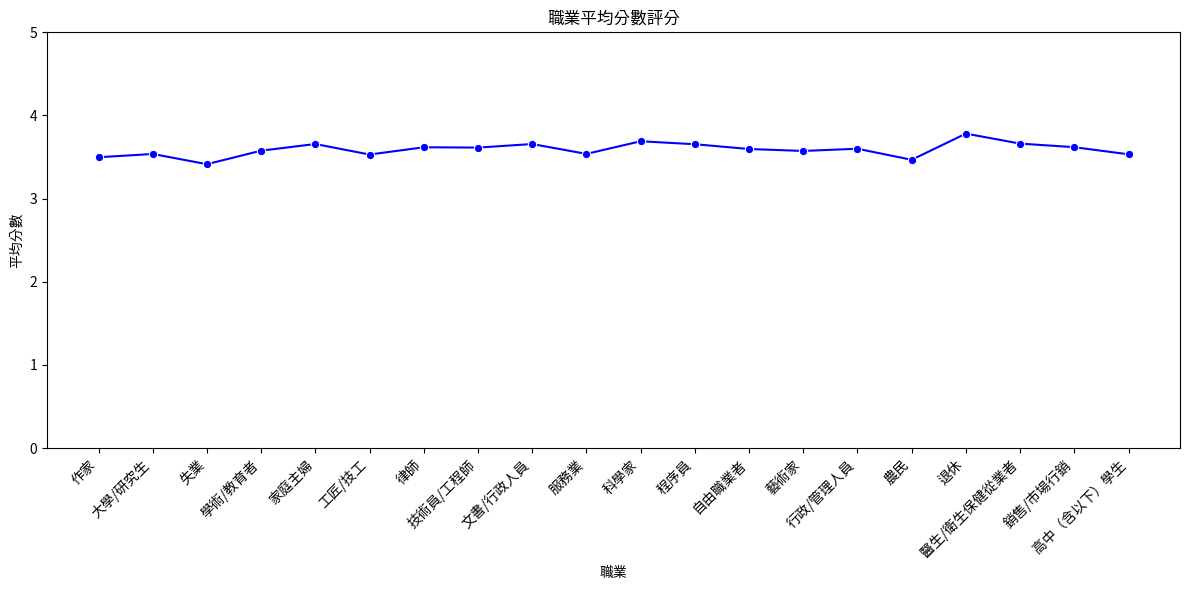

In [103]:
avg_rating_by_occupation = merged_data.groupby('Occupation_TW')['Rating'].mean()

plt.figure(figsize=(12, 6))

# 畫曲線圖
sns.lineplot(x=avg_rating_by_occupation.index, y=avg_rating_by_occupation.values, marker='o', color='b')

plt.title('職業平均分數評分')
plt.xlabel('職業')
plt.ylabel('平均分數')

plt.xticks(rotation=45, ha='right')

plt.ylim(0, 5)

plt.tight_layout()

plt.show()

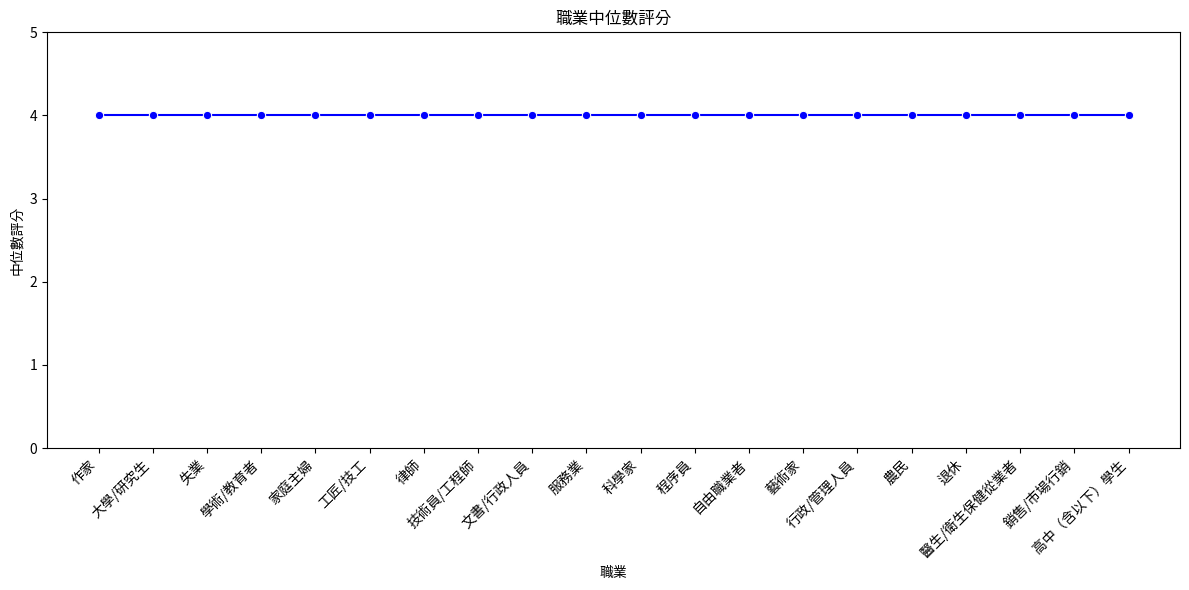

In [104]:
median_rating_by_occupation = merged_data.groupby('Occupation_TW')['Rating'].median()

plt.figure(figsize=(12, 6))


sns.lineplot(x=median_rating_by_occupation.index, y=median_rating_by_occupation.values, marker='o', color='b')


plt.title('職業中位數評分')
plt.xlabel('職業')
plt.ylabel('中位數評分')


plt.xticks(rotation=45, ha='right')


plt.ylim(0, 5)


plt.tight_layout()

plt.show()

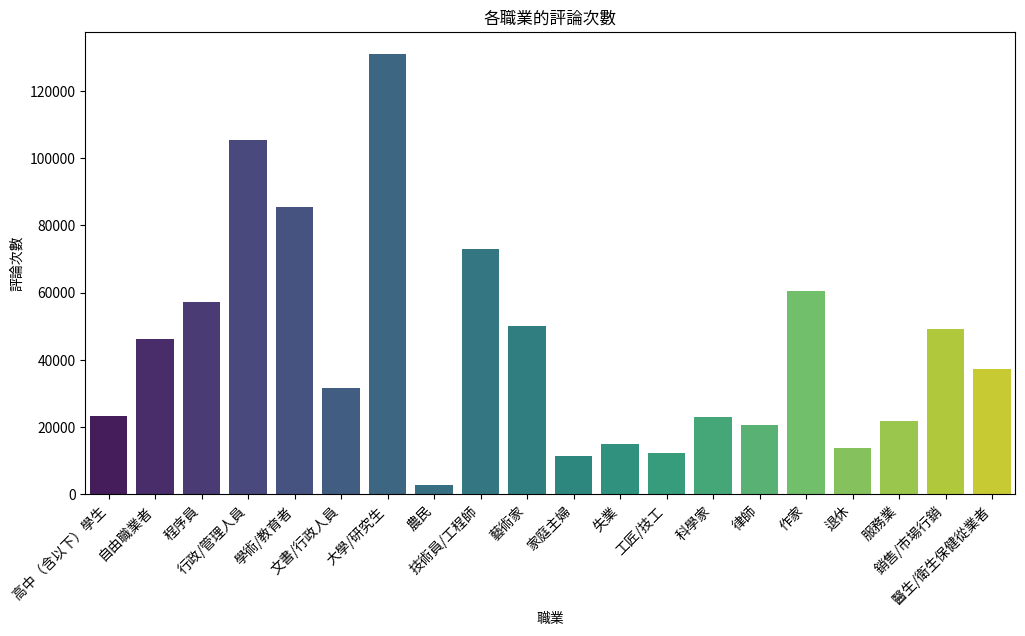

In [105]:
#評分次數關係
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation_TW', data=merged_data, palette='viridis')
plt.title('各職業的評論次數')
plt.xlabel('職業')
plt.ylabel('評論次數')
plt.xticks(rotation=45, ha='right')
plt.show()

In [106]:
# 計算評分



merged_data_split = merged_data.copy()
merged_data_split['Genres'] = merged_data['Genres'].str.split('|')

# 使用 explode() 拆Genres 列
exploded_data = merged_data_split.explode('Genres')
exploded_data = exploded_data.reset_index(drop=True)

#重設index
occupation_genre_ratings = exploded_data.groupby(['Occupation_TW', 'Genres'])['Rating'].mean().reset_index()

# Top5
top_genres_by_occupation = occupation_genre_ratings.groupby('Occupation_TW').apply(lambda x: x.nlargest(5, 'Rating')).reset_index(drop=True)

# 隨機顏色
random_colors = sns.color_palette('husl', n_colors=len(top_genres_by_occupation['Occupation_TW'].unique()))

unique_genres = exploded_data['Genres'].unique()

exploded_data



,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Occupation_TW,Datetime
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,高中（含以下）學生,2000-12-31 22:12:40
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,自由職業者,2000-12-31 21:33:33
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,程序員,2000-12-30 23:49:39
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,行政/管理人員,2000-12-30 18:01:19
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,學術/教育者,2000-12-30 06:41:11
...,...,...,...,...,...,...,...,...,...,...,...,...
1829932,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,技術員/工程師,2000-05-12 17:37:48
1829933,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy,作家,2000-05-08 03:30:08
1829934,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Drama,作家,2000-05-08 03:30:08
1829935,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Western,作家,2000-05-08 03:30:08


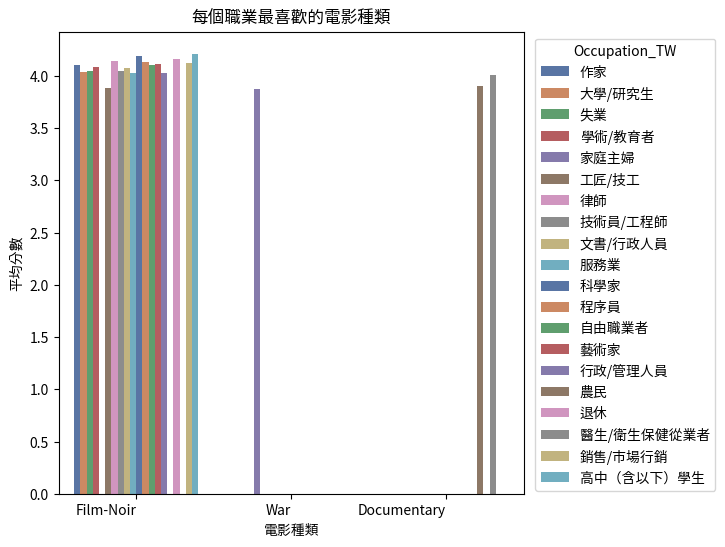

In [109]:
top1_genres_by_occupation = occupation_genre_ratings.groupby('Occupation_TW').apply(lambda x: x.nlargest(1, 'Rating')).reset_index(drop=True)

plt.figure(figsize=(6, 6))
sns.barplot(x='Genres', y='Rating', hue='Occupation_TW', data=top1_genres_by_occupation, palette='deep')


plt.title('每個職業最喜歡的電影種類')
plt.xlabel('電影種類')
plt.ylabel('平均分數')


plt.xticks(rotation=0, ha='right')
plt.legend(title='Occupation_TW', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

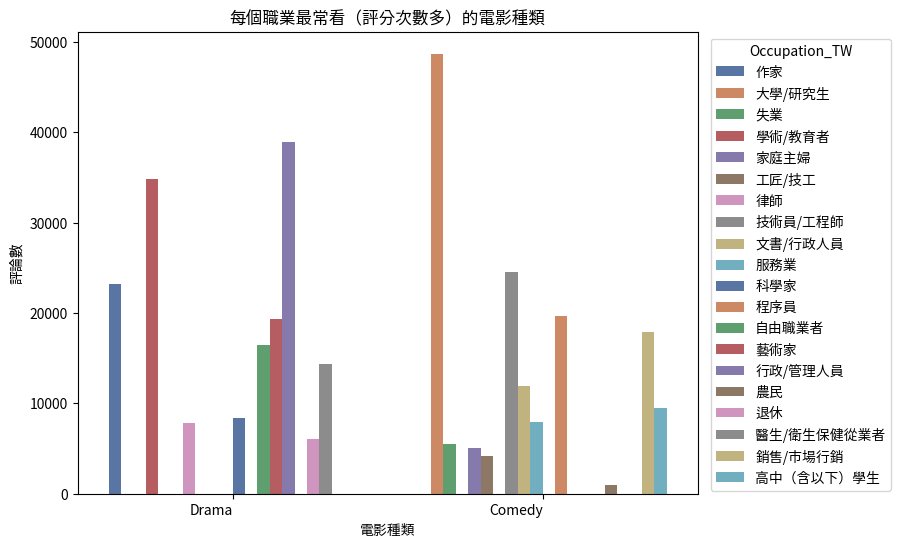

In [110]:

top1_common_genres_by_occupation = most_common_genres_by_occupation.groupby('Occupation_TW').head(1)

plt.figure(figsize=(8, 6))
sns.barplot(x='Genres', y='Count', hue='Occupation_TW', data=top1_common_genres_by_occupation, palette='deep')

plt.title('每個職業最常看（評分次數多）的電影種類')
plt.xlabel('電影種類')
plt.ylabel('評論數')

plt.xticks(rotation=0, ha='right')
plt.legend(title='Occupation_TW', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

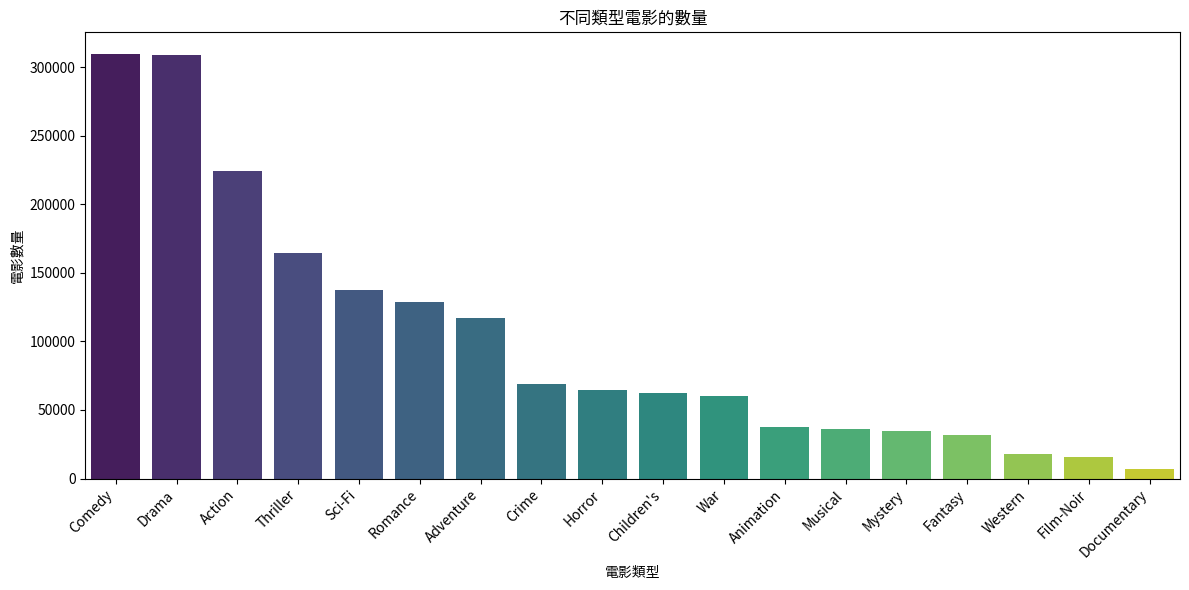

In [121]:
genres_count = exploded_data['Genres'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=genres_count.index, y=genres_count.values, palette='viridis')
plt.title('不同類型電影的數量')
plt.xlabel('電影類型')
plt.ylabel('電影數量')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

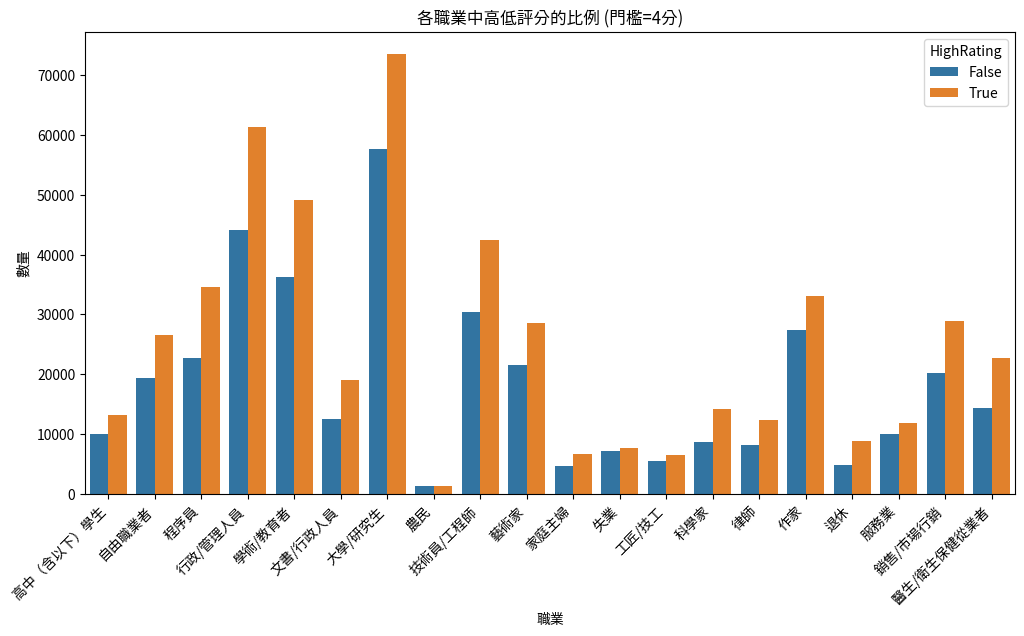

In [111]:
threshold = 4

merged_data['HighRating'] = merged_data['Rating'] >= threshold

plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation_TW', hue='HighRating', data=merged_data)
plt.title(f'各職業中高低評分的比例 (門檻={threshold}分)')
plt.xlabel('職業')
plt.ylabel('數量')
plt.xticks(rotation=45, ha='right')
plt.show()

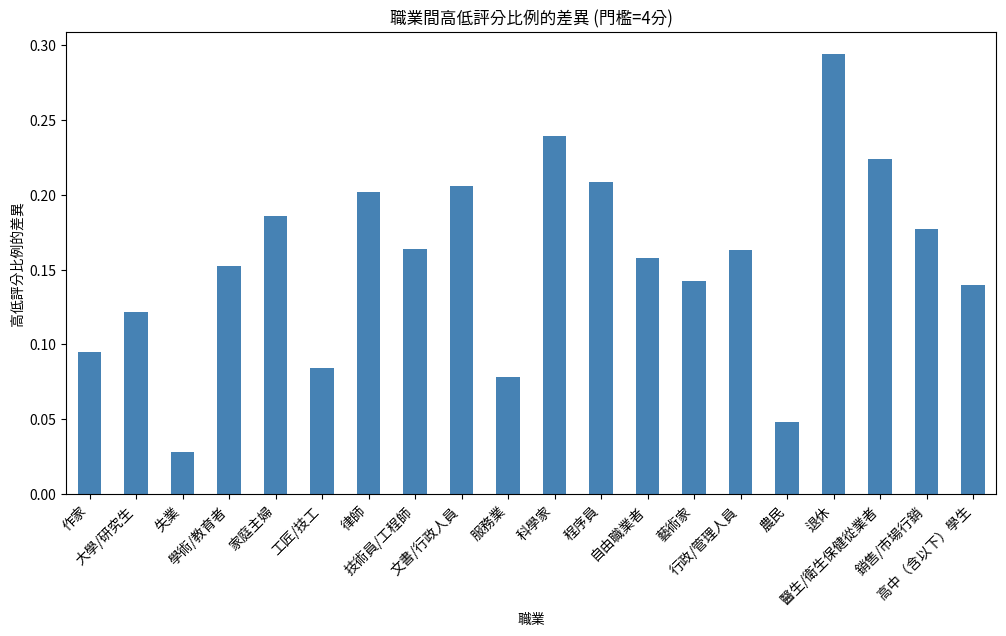

In [119]:
threshold = 4
random_colors = sns.color_palette('husl', n_colors=len(top1_common_genres_by_occupation['Occupation_TW'].unique()))

merged_data['HighRating'] = merged_data['Rating'] >= threshold


rating_proportions = merged_data.groupby('Occupation_TW')['HighRating'].mean()


rating_diff = rating_proportions - (1 - rating_proportions)



plt.figure(figsize=(12, 6))
rating_diff.plot(kind='bar', color='steelblue')
plt.title(f'職業間高低評分比例的差異 (門檻={threshold}分)')
plt.xlabel('職業')
plt.ylabel('高低評分比例的差異')
plt.xticks(rotation=45, ha='right')
plt.show()

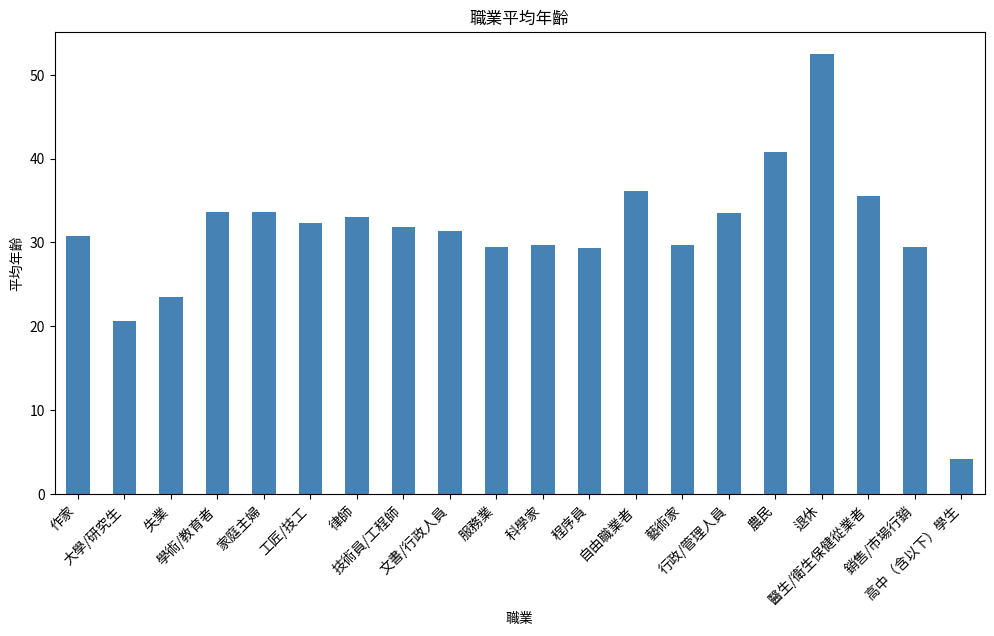

In [120]:

avg_age_by_occupation = merged_data.groupby('Occupation_TW')['Age'].mean()
plt.figure(figsize=(12, 6))
avg_age_by_occupation.plot(kind='bar', color='steelblue')
plt.title('職業平均年齡')
plt.xlabel('職業')
plt.ylabel('平均年齡')
plt.xticks(rotation=45, ha='right')
plt.show()

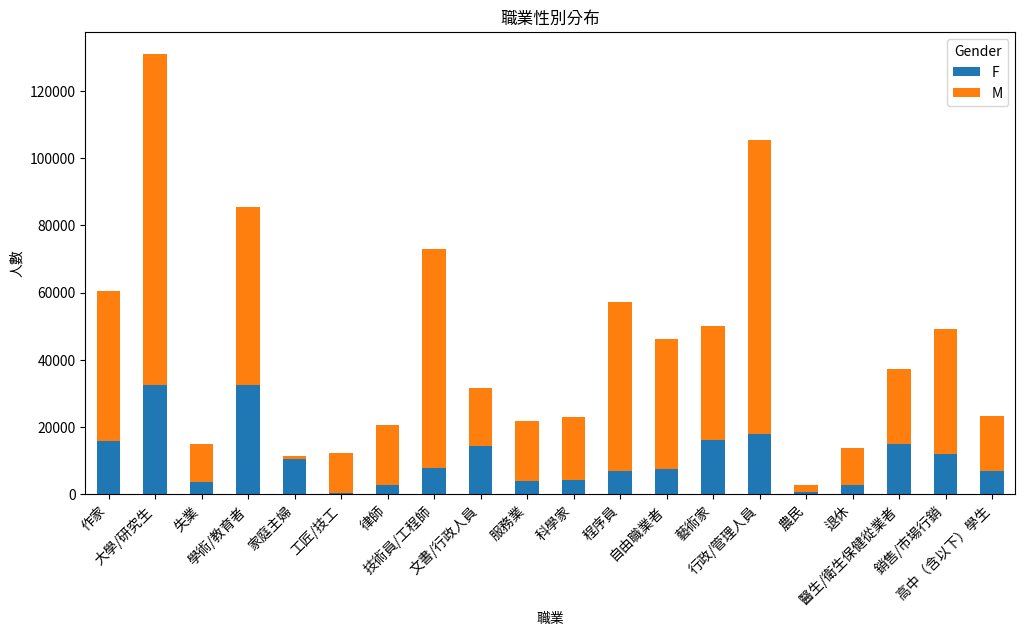

In [115]:
gender_by_occupation = merged_data.groupby(['Occupation_TW', 'Gender']).size().unstack()
gender_by_occupation.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('職業性別分布')
plt.xlabel('職業')
plt.ylabel('人數')
plt.xticks(rotation=45, ha='right')
plt.show()